Player with the highest Elo:
Position (in January)                      1
Name                                 Carlsen
ELO                                     2872
Date                     2020-01-01 00:00:00
Age                                       29
Year                                    2020
Name: 20, dtype: object


Top 10 Players with Highest Elo:
         Name   ELO
20    Carlsen  2872
140   Carlsen  2872
0     Carlsen  2862
120   Carlsen  2862
160   Carlsen  2861
420  Kasparov  2851
400  Kasparov  2849
360  Kasparov  2847
100   Carlsen  2844
80    Carlsen  2840




C:\Users\unnat\AppData\Local\Temp\ipykernel_20976\2303063281.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_avg_ELO = chess_data.groupby(['Year']).apply( lambda group: group.nlargest(10, 'ELO')['ELO'].mean())


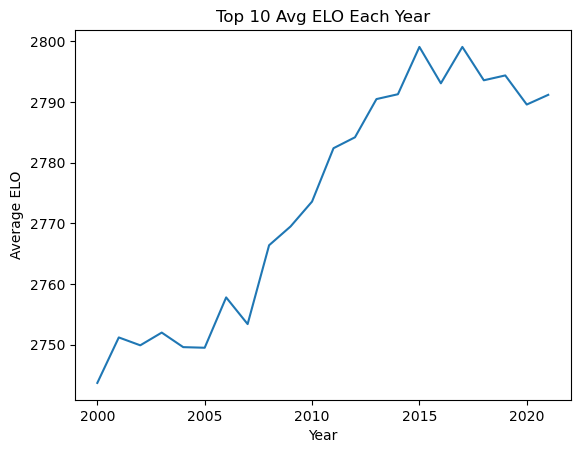

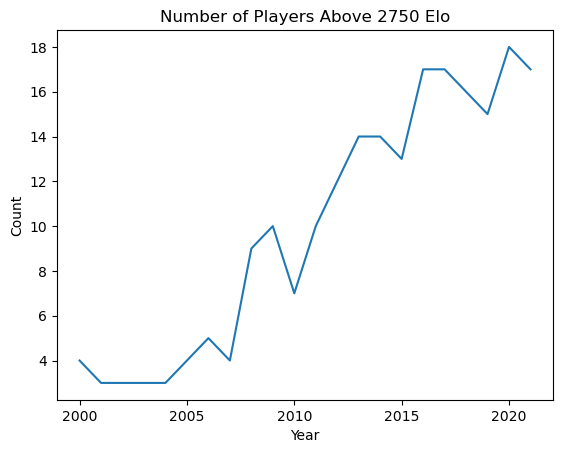

C:\Users\unnat\AppData\Local\Temp\ipykernel_20976\2303063281.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_avg_age = chess_data.groupby(['Year']).apply(lambda group: group.nlargest(10, 'ELO')['Age'].mean())


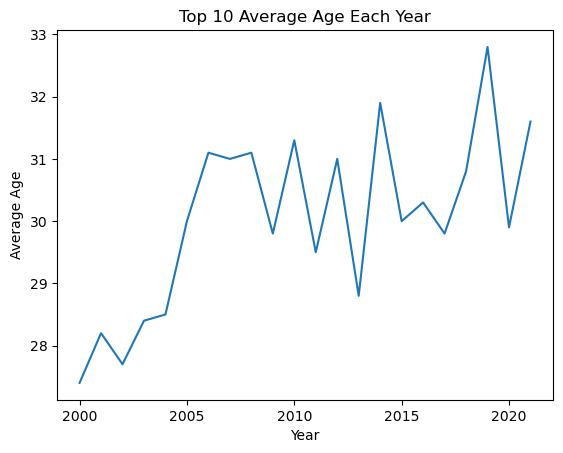

C:\Users\unnat\AppData\Local\Temp\ipykernel_20976\2303063281.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  under_25_count = chess_data.groupby(['Year']).apply(lambda group: sum(group.nlargest(10, 'ELO')['Age'] < 25))


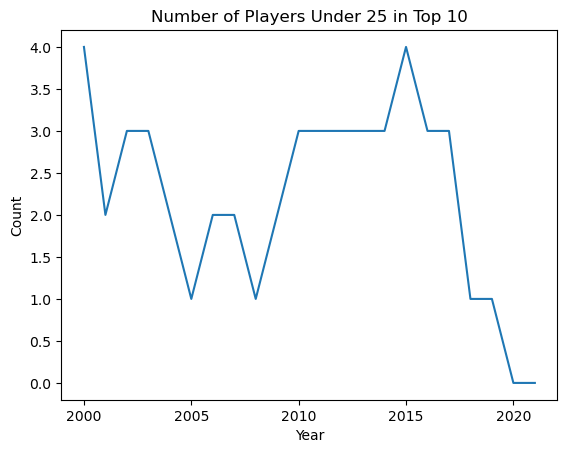

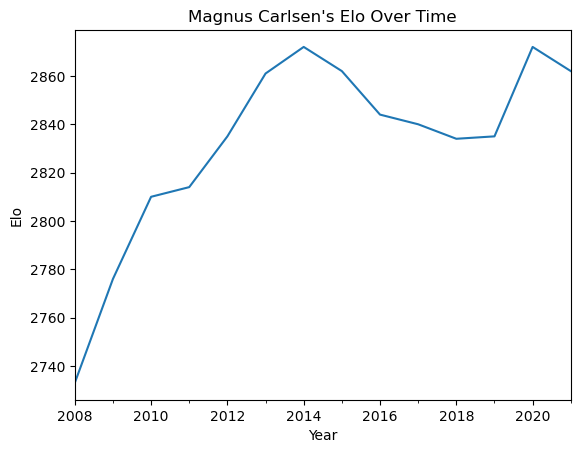

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
chess_data = pd.read_csv('Chess.csv')

# Convert the 'Date' column to datetime format
chess_data['Date'] = pd.to_datetime(chess_data['Date'], format='%Y %b', errors='coerce')

# Drop rows with invalid dates (if any)
chess_data = chess_data.dropna(subset=['Date'])

# Extract the year for grouping purposes
chess_data['Year'] = chess_data['Date'].dt.year

# Q1: Player with the highest Elo
highest_elo = chess_data.loc[chess_data['ELO'].idxmax()]
print("Player with the highest Elo:")
print(highest_elo)

print("\n")

# Q2: Top 10 Players with Highest Elo
top_10_players = chess_data.nlargest(10, 'ELO')
print("Top 10 Players with Highest Elo:")
print(top_10_players[['Name', 'ELO']])

print("\n")

# Q3
top_10_avg_ELO = chess_data.groupby(['Year']).apply( lambda group: group.nlargest(10, 'ELO')['ELO'].mean())
top_10_avg_ELO.plot(title="Top 10 Avg ELO Each Year", ylabel="Average ELO", xlabel="Year")
plt.show()

# Q4
above_2750_trend = chess_data[chess_data['ELO'] > 2750].groupby('Year').size()
above_2750_trend.plot(title="Number of Players Above 2750 Elo", ylabel="Count", xlabel="Year")
plt.show()

# Q5
top_10_avg_age = chess_data.groupby(['Year']).apply(lambda group: group.nlargest(10, 'ELO')['Age'].mean())
top_10_avg_age.plot(title="Top 10 Average Age Each Year", ylabel="Average Age", xlabel="Year")
plt.show()

# Q6
under_25_count = chess_data.groupby(['Year']).apply(lambda group: sum(group.nlargest(10, 'ELO')['Age'] < 25))
under_25_count.plot(title="Number of Players Under 25 in Top 10", ylabel="Count", xlabel="Year")
plt.show()

# Q7
magnus_elo_trend = chess_data[chess_data['Name'] == 'Carlsen'].set_index('Date')['ELO']
magnus_elo_trend.plot(title="Magnus Carlsen's Elo Over Time", ylabel="Elo", xlabel="Year")
plt.show()


Q3:-
It indicates that the top players are improving their Elo ratings over time. A stagnation or dip might suggest stronger competition or fewer significant rating gains among top players. This could reflect improvements in training methods, or a plateau due to the rating inflation/deflation.

Q4:- 
A growing trend suggests an increase in the depth of highly skilled players, while a decline might indicate a narrowing of top-level competition. Growth could be due to more tournaments and opportunities to gain rating points, while a decline might reflect fewer active elite players or adjustments in rating systems

Q5:-
If the average age is increasing, it indicates that top players are maintaining their dominance longer. A decline could mean younger players are breaking into the top ranks.Aging champions staying in form could signal experience being a key factor, while younger players dominating could indicate a generational shift.

Q6:-
An upward trend implies younger players are making significant breakthroughs, while a downward trend might suggest a stronger hold of older, experienced players. A rise could indicate better training for youth, while a decline might show the difficulty of displacing established players.

Q7:-
If the Elo shows steady growth or sustains a high level, it demonstrates Magnus' dominance and consistency. Fluctuations could indicate periods of intense competition. Long-term stability at a high Elo reflects Carlsen's exceptional skill